In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/forest_cover_dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cover_Type', axis=1), df['Cover_Type'], test_size=0.25)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:')
print(confusion_matrix)


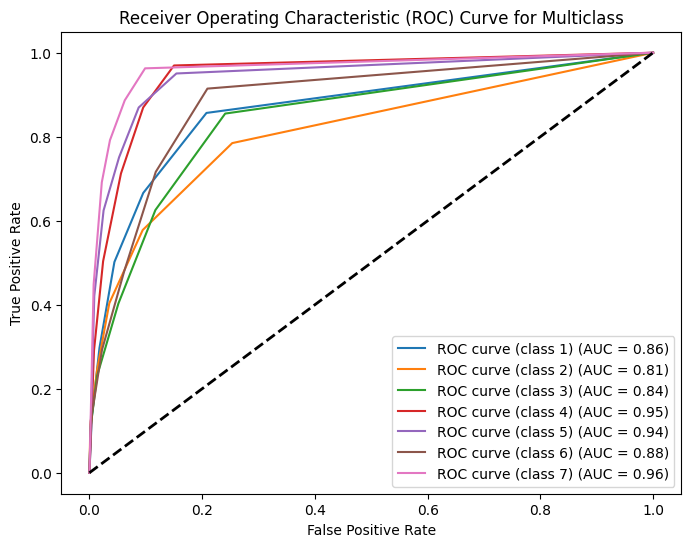

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the KNN model for multiclass classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Calculate decision function scores for all classes
y_score = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y_score.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=knn.classes_)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i + 1}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='best')
plt.show()


In [ ]:

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Create a learning curve for the KNN model
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=ShuffleSplit(n_splits=10, test_size=0.25), n_jobs=-1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning curve for KNN model')
plt.legend(loc='best')
plt.show()


In [ ]:

#implementing dimensionality reduction for the KNN(PCA-Principal Component Analysis)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('/content/forest_cover_dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cover_Type', axis=1), df['Cover_Type'], test_size=0.25)

# Perform PCA dimensionality reduction
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:')
print(confusion_matrix)


Accuracy: 0.6243386243386243
Precision: 0.6184461576204248
Recall: 0.6243386243386243
Confusion matrix:
[[329  97  12   1  47   7  79]
 [131 216  19   8  68  23  23]
 [ 11  18 280 118  34  96   9]
 [  0   1  79 430   6  44   0]
 [  9  17  30  25 398  24   3]
 [ 14  25 124  67  30 278  12]
 [ 46  23   6   0  21  13 429]]


In [ ]:
#ROC curve for the PCA implemented KNN
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the dataset
df = pd.read_csv('/content/forest_cover_dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cover_Type', axis=1), df['Cover_Type'], test_size=0.25)

# Perform PCA dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train_pca, y_train)

# Make predictions on the test data for probabilities
y_score = knn.predict_proba(X_test_pca)

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(y_test, classes=knn.classes_)

# Compute ROC curve and ROC area for each class
n_classes = len(knn.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i + 1}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass after PCA')
plt.legend(loc='best')
plt.show()


In [ ]:
#correlation heat map after PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#pairplot after PCA
# Combine the PCA-reduced features and target variable
df_pca = pd.DataFrame(X_train, columns=[f"PC{i+1}" for i in range(X_train.shape[1])])
df_pca['Cover_Type'] = y_train.reset_index(drop=True)

# Visualize pairplot after PCA dimensionality reduction
sns.pairplot(df_pca, hue='Cover_Type', diag_kind='kde')
plt.title('Pairplot after PCA Dimensionality Reduction')
plt.show()
